In [52]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [53]:
df=pd.read_csv('data/bank.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [54]:
# df['y']=np.where(df['y']=='no',0,df['y'])
# df['y']=np.where(df['y']=='yes',1,df['y'])
print(df['y'].unique())
print(df['y'].value_counts())

['no' 'yes']
no     4000
yes     521
Name: y, dtype: int64


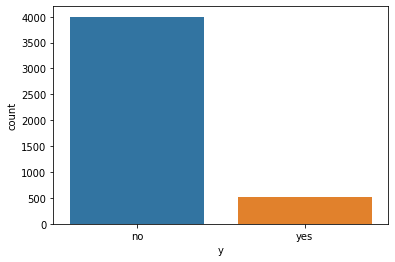

In [55]:
sns.countplot('y',data=df)

In [56]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


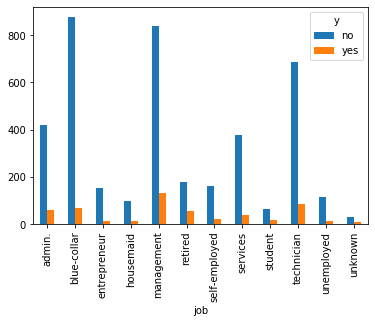

In [57]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')

In [58]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [59]:
X=df.iloc[:,:-1]
X.head()
y=df.y


In [60]:
enc = LabelEncoder()
X = \
X.apply(enc.fit_transform)

X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3


In [61]:
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

In [62]:
smote=SMOTE()

In [63]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [64]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'no': 2794, 'yes': 370})
After SMOTE : Counter({'no': 2794, 'yes': 2794})


In [65]:
model=LogisticRegression()
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7730287398673544


C:\Users\Alish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


col_0,no,yes
y,,
no,933,273
yes,35,116
